# Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Establishing Working Directory

In [2]:
os.getcwd()
os.chdir("C:\\Users\\bfran\\Ironhack\\Week 5\\Week 5 Labs\\lab-eda-univariate")

# Loading and Exploring Dataframe df

In [3]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv', encoding='unicode_escape')
df
# Tells us that our data has 2.4 million rows and 9 columns, also gives head and tail. 

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Menâs Motorcycle Motorbike Biker Trousers Ke...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
# Gives us the data type of each column
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [5]:
df.select_dtypes("number").nunique().sort_values(ascending=False)
# Shows that price and number of reviews are continuous variables...
# suggests that stars and bought in last month might be discreet or categorical

uid                  2443651
price                  82916
reviews                19446
stars                     42
boughtInLastMonth         25
dtype: int64

In [6]:
df['boughtInLastMonth'].value_counts()
# shows that this variable is a discreet variable

boughtInLastMonth
0        2230204
50         75790
100        58578
200        24200
300        13650
400         8836
1000        8692
500         6110
600         4320
700         3121
2000        2550
800         2456
900         2070
3000        1130
4000         634
5000         430
10000        259
6000         223
7000         150
8000         116
9000          97
20000         27
50000          3
30000          3
40000          2
Name: count, dtype: int64

In [7]:
df['stars'].value_counts()
# shows that stars variable is also discreet

stars
0.0    1225641
4.5     151577
4.6     136995
4.4     136165
5.0     128492
4.3     112564
4.7      94566
4.2      86871
4.0      66089
4.1      65115
4.8      41858
3.9      36555
3.8      27876
3.7      21137
3.6      16219
3.5      14673
3.0      12819
4.9      11081
3.4      10355
1.0       8484
3.3       8269
3.2       5771
3.1       4679
2.0       3901
2.9       3341
2.8       2306
2.7       2104
2.5       2103
2.6       1579
2.4       1060
2.3        734
2.2        602
2.1        540
1.5        404
1.9        300
1.8        249
1.7        177
1.4        149
1.6        147
1.3         78
1.2         23
1.1          3
Name: count, dtype: int64

In [8]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)
# No missings at all, lovely!

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

# Cleaning Data For Analysis

In [9]:
# Drops useless uid and asin columns
df.drop("uid", inplace=True, axis=1)
df.drop("asin", inplace=True, axis=1)

In [10]:
# Separates df into categorical and numeric subsets
cat_cols = ['title','isBestSeller', 'category']
num_cols = ['stars','reviews','price','boughtInLastMonth']

df_cat = df[cat_cols]
df_num = df[num_cols]

df_num

,stars,reviews,price,boughtInLastMonth
0,4.7,15308,21.99,0
1,4.7,98099,23.99,0
2,4.7,15308,21.99,0
3,4.7,7205,31.99,0
4,4.6,1881,17.99,0
...,...,...,...,...
2443646,0.0,0,22.34,0
2443647,0.0,0,97.99,0
2443648,0.0,0,52.99,0
2443649,4.3,404,79.99,0


# Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [11]:
# Generating a frequency table
my_table = pd.crosstab(index = df["category"],  # Make a crosstab
                              columns="count")      # Name the count column
my_table = my_table.sort_values(by = 'count', ascending=False)
my_table.head()

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978


This shows that the top 5 categories are
1. Sports & Outdoors, with 836265 orders in that category - major red flag here, potential outlier or something
2. Beauty, with 19312 orders
3. Handmade Clothing, Shoes & Accessories, with 19229 orders
4. Bath & Body, with 19092 orders
5. Birthday Gifts, with 18978 orders

C:\Users\bfran\AppData\Local\Temp\ipykernel_9664\2214849650.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5.index, y=top_5.values, palette="Set3");


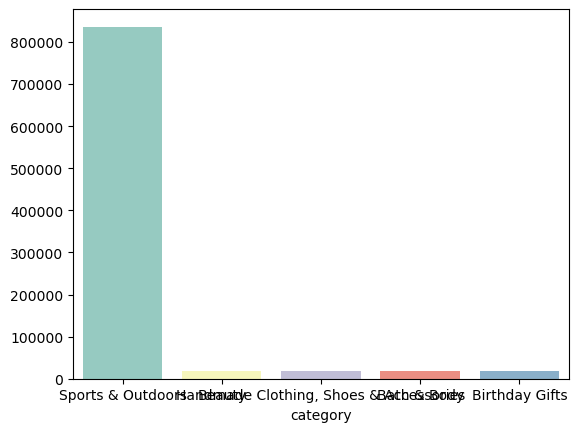

In [12]:
# Create a frequency table
frequency_table = df['category'].value_counts()

# Creates a subset
top_5 = frequency_table.sort_values(ascending=False).head()

# Creating a  barchart visualization
sns.barplot(x=top_5.index, y=top_5.values, palette="Set3");


In [13]:
top_5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

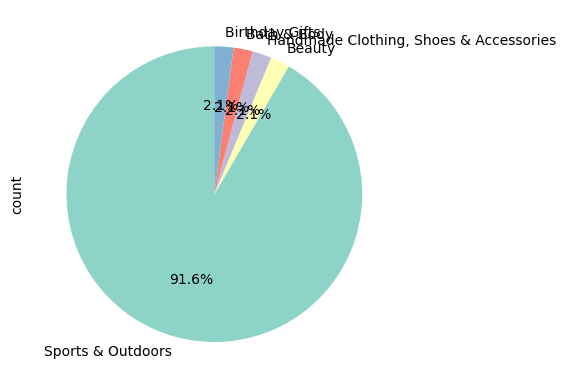

In [14]:
# Creating a pie chart visualization
top_5.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"));

Sports & Outdoors definitely dominates the pie chart. 

# Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [15]:
# Remove scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Pull up descriptive statistics, including mean and median, for price column of df. 
df['price'].describe().T

count   2443651.00
mean         89.24
std         345.61
min           0.00
25%           9.99
50%          19.09
75%          45.99
max      100000.00
Name: price, dtype: float64

In [16]:
df['price'].mode()

0   9.99
Name: price, dtype: float64

So the mean is $89.24, and the median price is $19.09, whereas the mode, or most frequent, price is $9.99.

This suggests that although $9.99 appears most frequently, there are significantly more expensive items pulling the median and the average much, much higher. 

In [17]:
# Calculate variance for price column.
df['price'].var()

119445.48532256528

In [18]:
# Calculate standard deviation of price column
df['price'].std() 

345.60886175352226

In [19]:
# Calculate Range
df['price'].max() - df['price'].min()

100000.0

In [20]:
# Calculate interquartile range
df['price'].quantile(.75) - df['price'].quantile(.25)

36.0

The standard deviation is huge, and with the mean being less than the standard deviation, it means that the lowest price ($0) is less than one standard deviation from the average. This shows that the data is very right skewed. The range of prices being between zero and 100000 suggests that there are likely some expensive outliers that are skewing the data.

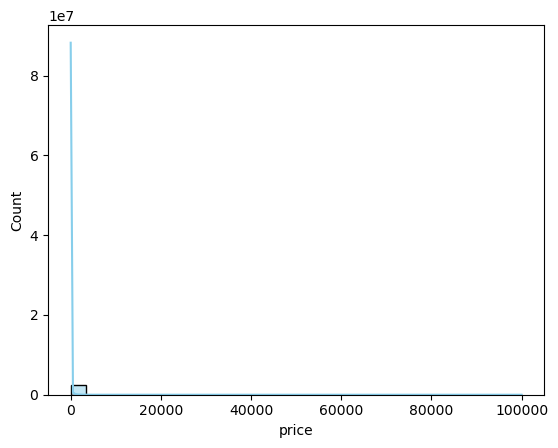

In [23]:
# Create histogram
sns.histplot(df['price'], kde=True, bins=30, color="skyblue")
# This plot is nigh unto illegible. 

<Axes: xlabel='price', ylabel='Count'>

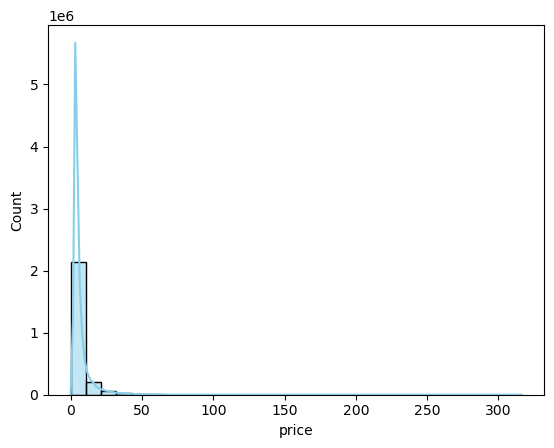

In [22]:
# Gets square root of the prices to try and make chart more readable.
sns.histplot(np.sqrt(df['price']), kde=True, bins=30, color="skyblue")
# It succeeded, but I think I can do better. 

<Axes: xlabel='price_capped', ylabel='Count'>

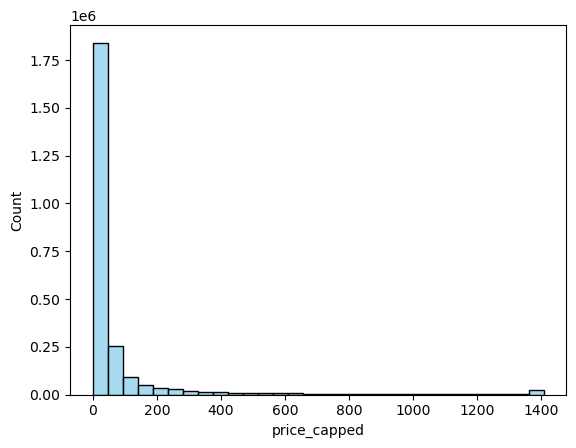

In [25]:
# Establishes a cap on the price to remove the most egregious outliers. 
cap_value = df['price'].quantile(0.99)

# Creates a new column in which where prices greater than the cap value are replaced with the cap value. 
df['price_capped'] = np.where(df['price'] > cap_value, cap_value, df['price'])

# Plots a histogram of the capped data
sns.histplot(df['price_capped'], bins=30, color="skyblue")

# Does better, but it seems that there are still significant outliers making the data still slightly illegible. 

<Axes: xlabel='price_capped', ylabel='Count'>

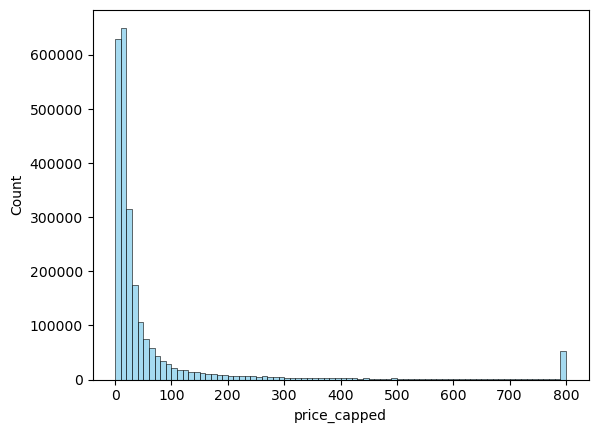

In [29]:
# The chart above suggests that anything over 800 should probably be considered an outlier. 

# Establishes a new cap of 800.  
cap_value = 800

# Creates a new column in which where prices greater than the cap value are replaced with the cap value. 
df['price_capped'] = np.where(df['price'] > cap_value, cap_value, df['price'])

# Plots a histogram of the capped data
# Increases the number of bins for more specificity and legibility. 
# 80 bins w/ a cap of $800 puts the bins at $10 increments. 
sns.histplot(df['price_capped'], bins=80, color="skyblue")

So this final chart demonstrates that the vast majority of products sold on Amazon seem to be priced below $30, with the highest frequency of pricing being between $10 and $20. 

It seems that anything above $800 should be considered an outlier, and all products priced higher than that, all of which are skewing the data significantly despite the fact that there are fewer of them than there are items priced at about $60.

# Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [32]:
# 1. **Measures of Centrality**:
#     - Calculate the mean, median, and mode for the `rating` of products.
#     - How do customers generally rate products? Is there a common trend? 
df['stars'].describe()

count   2443651.00
mean          2.15
std           2.19
min           0.00
25%           0.00
50%           0.00
75%           4.40
max           5.00
Name: stars, dtype: float64

In [33]:
df['stars'].mode()

0   0.00
Name: stars, dtype: float64

The mean, or average, number of stars is 2.15, but the median and mode number of stars is 0.0. This suggests that the majority of products actually haven't been reviewed, and that higher reviews distort the 'stars' average to be higher. 

In [36]:
# 2. **Measures of Dispersion**:
#     - Determine the variance, standard deviation, and interquartile range for product `rating`.
#     - Are the ratings consistent, or is there a wide variation in customer feedback?

# Calculates variance
df['stars'].var()

4.81743402976196

In [37]:
# Calculates standard deviation
df['stars'].std()

2.1948653785054697

In [38]:
# Calculates interquartile range
df['stars'].quantile(.75) - df['stars'].quantile(.25)

4.4

The fact that the standard deviation is 2.19 stars means that getting just one standard deviation away from the mean covers almost the entire range of possible product ratings. This suggests that there is very little variance, which is unsurprising considering that there are only 42 possible values for millions of products. 

In [39]:
# 3. **Shape of the Distribution**:
#     - Calculate the skewness and kurtosis for the `rating` column. 
#     - Are the ratings normally distributed, or do they lean towards higher or lower values?

skewness = df['stars'].skew()
kurtosis = df['stars'].kurtosis()

skewness, kurtosis

(0.08120735761080985, -1.9260061280432985)

The very low skewness value suggest that the data is not skewed. This isn't surprising, though, given that there are only 42 possible ratings for millions of products. This is also reflected in the negative kurtosis value, which usually indicates that there are few outliers in the data and not a great amount of variability. Again, this is not surprising given the few number of possible values for such a large dataset. 

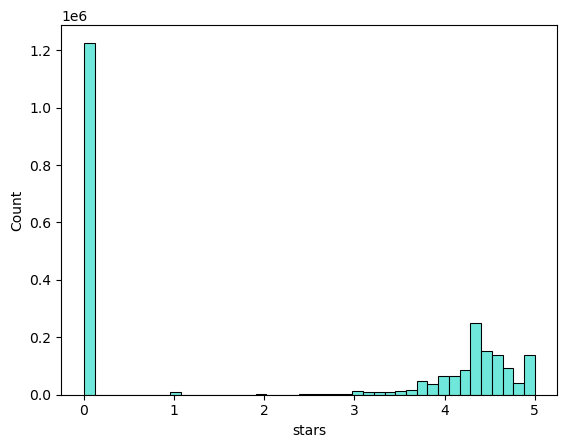

In [47]:
# 4. **Visualizations**:
#     - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

sns.histplot(df['stars'], bins = 42, color = 'turquoise');

This histogram demonstrates that the vast majority of products (more than 1.2 million) sold on Amazon have no rating at all. 

Excluding the items without ratings the data seems to have a fairly normal distribution around 4.3 or 4.4 stars. The two abnormalities are that 1) the data is skewed left, having a long left tail, and 2) there is a high concentration of 5.0 ratings. 

The high concentration of no ratings products likely has two explanations. For starters, Amazon suffers from a sort of selection bias where products with more reviews get more purchases, which in turn bring in more reviews. This can create a substantial 'review gap' between products that are virtually identical. Another possible explanation is that sellers can pay Amazon to 'promote' their products above others. This brings in more sales, and more reviews, and also contributes to the gap. 

The high concentration of 5.0 ratings may be explainable by the a few things. First off, 5.0 is the highest possible rating - were it possible for ratings to go higher than that, we may see a more even distribution past 5.0. Second, products often come with promotional offers for giving 5-star ratings, which can boost the number of 5.0 ratings a product receives despite it not being a product worth that rating.